<a href="https://colab.research.google.com/github/Sunilkv20164012/Classify-Apparels/blob/master/Kerascurr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install PyDrive


    100% |████████████████████████████████| 993kB 21.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id':'1BZOv422XJvxFUnGh-0xVeSvgFgqVY45q'})

1BZOv422XJvxFUnGh-0xVeSvgFgqVY45q

In [0]:
download.GetContentFile('train_LbELtWX.zip')

In [0]:
!unzip train_LbELtWX.zip

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

In [0]:
train = pd.read_csv('train.csv')

In [53]:
train_image = []
for i in tqdm(range(train.shape[0])):
  img=image.load_img('train/'+train['id'][i].astype('str')+'.png',target_size=(28,28,1),grayscale=True)
  img=image.img_to_array(img)
  img=img/255
  train_image.append(img)
 
X = np.array(train_image)

  0%|          | 0/60000 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:98: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 60000/60000 [00:22<00:00, 2703.04it/s]


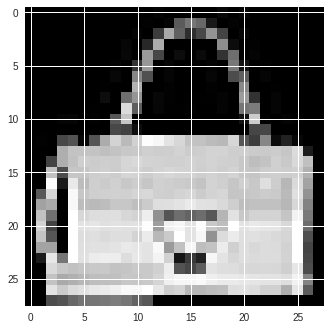

In [54]:
import os
os.listdir("train")
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('train/3210.png')
imgplot = plt.imshow(img)
plt.show()

In [0]:
y=train['label'].values
y=to_categorical(y)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [0]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))


In [0]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [62]:
model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 180s 4ms/step - loss: 0.5126 - acc: 0.8188 - val_loss: 0.3181 - val_acc: 0.8847
Epoch 2/10
48000/48000 [==============================] - 181s 4ms/step - loss: 0.3382 - acc: 0.8779 - val_loss: 0.2623 - val_acc: 0.9001
Epoch 3/10
48000/48000 [==============================] - 182s 4ms/step - loss: 0.2888 - acc: 0.8944 - val_loss: 0.2474 - val_acc: 0.9104
Epoch 4/10
48000/48000 [==============================] - 181s 4ms/step - loss: 0.2559 - acc: 0.9065 - val_loss: 0.2354 - val_acc: 0.9118
Epoch 5/10
48000/48000 [==============================] - 181s 4ms/step - loss: 0.2299 - acc: 0.9146 - val_loss: 0.2278 - val_acc: 0.9155
Epoch 6/10
48000/48000 [==============================] - 180s 4ms/step - loss: 0.2136 - acc: 0.9201 - val_loss: 0.2222 - val_acc: 0.9195
Epoch 7/10
48000/48000 [==============================] - 181s 4ms/step - 

In [63]:
scores=model.evaluate(X_train,y_train,verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
 
!pip install h5py
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")





acc: 96.78%
Saved model to disk


In [0]:
# later...
 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 

In [0]:
download=drive.CreateFile({'id':'1KuyWGFEpj7Fr2DgBsW8qsWvjqEzfoJBY'})


In [72]:
download.GetContentFile('test_ScVgIM0.zip')
!unzip test_ScVgIM0.zip

InvalidConfigError: ignored

In [0]:

download=drive.CreateFile({'id':'1z4QXy7WravpSjS4Cs9Fk*ZNaX-qh5HF'})
download.GetContentFile('sample_submission_I5njJSF.csv')

sample=pd.read__csv('sample_submission_I5njJSF.csv')
sample['label']=prediction
sample.to_csv('sample_cnn.csv',header=true,index=False)